In [1]:
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas para tratamento de dados em cpu
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para treinamento e cálculo de métricas em CPU
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split as cpu_train_test_split
from sklearn.ensemble import RandomForestClassifier as cpu_RandomForestClassifier
from sklearn.metrics import accuracy_score as cpu_accuracy_score
from sklearn.metrics import confusion_matrix as cpu_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Ver muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Carregamento dos dados
df= pd.read_csv('/content/drive/My Drive/fraud_detection_dataset.csv', sep = ',', encoding='UTF-8',
             header = 0)

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0
2,1,TRANSFER,181.00000,C1305486145,181.00000,0.00000,C553264065,0.00000,0.00000,1,0
3,1,CASH_OUT,181.00000,C840083671,181.00000,0.00000,C38997010,21182.00000,0.00000,1,0
4,1,PAYMENT,11668.14000,C2048537720,41554.00000,29885.86000,M1230701703,0.00000,0.00000,0,0


In [7]:
%%time
from time import sleep
for i in range(3):
  print(i,end=' ')
  sleep(0.1)

0 1 2 CPU times: user 7.52 ms, sys: 169 µs, total: 7.69 ms
Wall time: 303 ms


In [11]:
### Avaliando o banco de dados
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
CPU times: user 6.54 ms, sys: 1.96 ms, total: 8.5 ms
Wall time: 7.64 ms


In [13]:
# Avaliando a presença de missings
%%time
df.isnull().sum()

CPU times: user 1.43 s, sys: 4.57 ms, total: 1.43 s
Wall time: 1.56 s


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# EDA


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


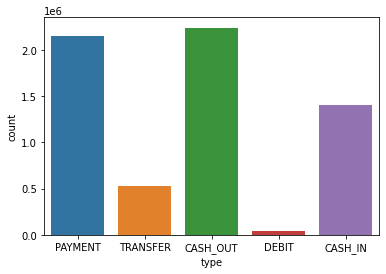

In [18]:
# Visualização gráfica
print(df.type.value_counts())
_ = sns.countplot(x="type", data=df)

0    6354407
1       8213
Name: isFraud, dtype: int64


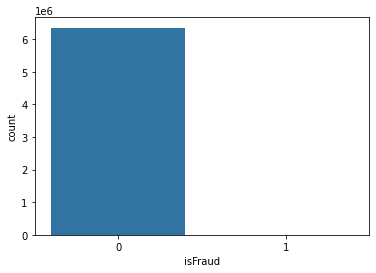

In [19]:
# Avaliando a variável target
print(df.isFraud.value_counts())
x = sns.countplot(x="isFraud", data=df)

In [22]:
# Avaliando a porcentagem de fraude
8213/(6354407+8213)* 100

0.12908204481801522

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


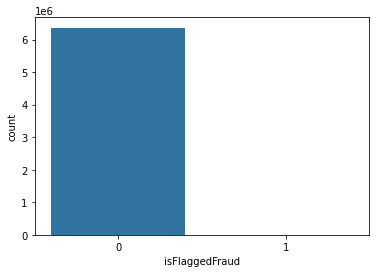

In [27]:
print(df.isFlaggedFraud.value_counts())
y = sns.countplot("isFlaggedFraud", data=df)

# Feature Engineering

In [29]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000
mean,243.39725,179861.90355,833883.10407,855113.66858,1100701.66652,1224996.39820,0.00129,0.00000
std,142.33197,603858.23146,2888242.67301,2924048.50297,3399180.11297,3674128.94209,0.03590,0.00159
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,156.00000,13389.57000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,239.00000,74871.94000,14208.00000,0.00000,132705.66500,214661.44000,0.00000,0.00000
75%,335.00000,208721.47750,107315.17500,144258.41000,943036.70750,1111909.25000,0.00000,0.00000
max,743.00000,92445516.64000,59585040.37000,49585040.37000,356015889.35000,356179278.92000,1.00000,1.00000


In [30]:
# Dropando dados duplicados
df.drop_duplicates(keep=False, inplace=True)

In [31]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000
mean,243.39725,179861.90355,833883.10407,855113.66858,1100701.66652,1224996.39820,0.00129,0.00000
std,142.33197,603858.23146,2888242.67301,2924048.50297,3399180.11297,3674128.94209,0.03590,0.00159
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,156.00000,13389.57000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,239.00000,74871.94000,14208.00000,0.00000,132705.66500,214661.44000,0.00000,0.00000
75%,335.00000,208721.47750,107315.17500,144258.41000,943036.70750,1111909.25000,0.00000,0.00000
max,743.00000,92445516.64000,59585040.37000,49585040.37000,356015889.35000,356179278.92000,1.00000,1.00000


# Categorização das transferências

In [32]:
# Categorização do amount(quantia total transferida) com base na mediana e no 1 quartil
def transfer_category(x):
    if x >= 74871.94:
        return('HIGH')
    elif x < 74871.94 and x >= 13389.57:
        return('MODERATE')
    elif x < 13389.57:
        return('LOW')
    else:
        return("EXTREMLY LOW")
df['transfer_amount_category'] = df.amount.apply(transfer_category)    
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer_amount_category
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0,LOW
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0,LOW


In [34]:
# Usando o Encoder para transformação de features categóricas
label_encoder = LabelEncoder() 
df['type_encode'] = label_encoder.fit_transform(df['type']) 
df['nameOrig_encode'] = label_encoder.fit_transform(df['nameOrig']) 
df['nameDest_encode'] = label_encoder.fit_transform(df['nameDest']) 
df['transfer_amount_category_encode'] = label_encoder.fit_transform(df['transfer_amount_category']) 

In [35]:
# Visualizando somente as 2 primeiras linhas
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer_amount_category,type_encode,nameOrig_encode,nameDest_encode,transfer_amount_category_encode
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0,LOW,3,757869,1662094,1
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0,LOW,3,2188998,1733924,1


In [39]:
# Normalizando as features numéricas
%%time
normalizer = Normalizer()
amount_scale = normalizer.fit_transform(df.amount.values.reshape(1,-1))
df['amount_norm'] = amount_scale.reshape(-1,1)
amount_oldbalanceOrg = normalizer.fit_transform(df.oldbalanceOrg.values.reshape(1,-1))
df['oldbalanceOrg_norm'] = amount_oldbalanceOrg.reshape(-1,1)
amount_newbalanceOrig = normalizer.fit_transform(df.newbalanceOrig.values.reshape(1,-1))
df['newbalanceOrig_norm'] = amount_newbalanceOrig.reshape(-1,1)
amount_oldbalanceDest= normalizer.fit_transform(df.oldbalanceDest.values.reshape(1,-1))
df['oldbalanceDest_norm'] = amount_oldbalanceDest.reshape(-1,1)
amount_newbalanceDest = normalizer.fit_transform(df.newbalanceDest.values.reshape(1,-1))
df['newbalanceDest_norm'] = amount_newbalanceDest.reshape(-1,1)

CPU times: user 216 ms, sys: 0 ns, total: 216 ms
Wall time: 216 ms


In [40]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer_amount_category,type_encode,nameOrig_encode,nameDest_encode,transfer_amount_category_encode,amount_norm,oldbalanceOrg_norm,newbalanceOrig_norm,oldbalanceDest_norm,newbalanceDest_norm
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0,LOW,3,757869,1662094,1,0.00001,0.00002,0.00002,0.00000,0.00000
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0,LOW,3,2188998,1733924,1,0.00000,0.00000,0.00000,0.00000,0.00000


# Modelagem

### Split dados treino e dados teste

In [44]:
X = df[['type_encode','nameOrig_encode','nameDest_encode',
          'transfer_amount_category_encode','amount_norm',
          'oldbalanceOrg_norm','newbalanceOrig_norm',
          'oldbalanceDest_norm','newbalanceDest_norm','isFlaggedFraud']]
y = df["isFraud"]
X_train, X_test, y_train, y_test = cpu_train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

### Random Forest (floresta randômica)

In [45]:
%%time
# Criando o modelo Random Forest em CPU
cpu_clf = cpu_RandomForestClassifier(n_estimators = 5, random_state = 42)   
  
# Treinamento do modelo Random Forest em CPU
cpu_clf.fit(X_train, y_train) 

CPU times: user 1min 30s, sys: 129 ms, total: 1min 30s
Wall time: 1min 30s


In [46]:
%%time
# Predições
y_pred_cpu = cpu_clf.predict(X_test) 

CPU times: user 1.62 s, sys: 6.63 ms, total: 1.62 s
Wall time: 2.07 s


### Avaliação das métricas do modelo random forest

In [47]:
# Printandoa a acurácia e matriz de confusão
print("Acurácia: ", cpu_accuracy_score(y_test, y_pred_cpu))


Acurácia:  0.9994851559653564
Matriz de confusão:  [[2096937      18]
 [   1063    1647]]


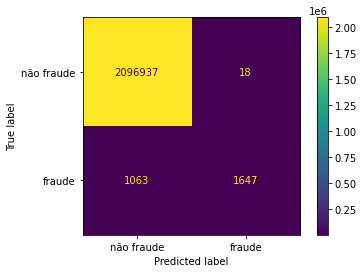

In [49]:
# Visualização gráfica
matriz_c = cpu_confusion_matrix(y_test, y_pred_cpu)
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_c, display_labels=['não fraude', 'fraude'])
_ = disp.plot(values_format='d')

In [53]:
# Probabilidade da classificação
y_pred_proba = cpu_clf.predict_proba(X_test)

In [54]:
print(y_pred_proba[:5])

[[9.97960177e-01 2.03982318e-03]
 [9.99450427e-01 5.49573278e-04]
 [1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]]


### Modelo XGBoost

In [56]:
%%time
# Algoritmo XGBoost
from xgboost import XGBClassifier
# Parametrização do XGBoost
params = {'learning_rate': 0.1,
          'colsample_bytree' : 0.3,
          'max_depth': 5,
          'objective': 'binary:logistic',
          'alpha' : 10,
          'n_estimators': 100}

# Treinamento do modelo XGBoost
cpu_trained_model = XGBClassifier(**params)
cpu_trained_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
                      eval_metric='auc', verbose=False)

[14:59:01] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 8min 29s, sys: 2.22 s, total: 8min 31s
Wall time: 8min 30s


In [61]:
%%time
# Predições
y_pred_cpu = cpu_trained_model.predict(X_test) 

CPU times: user 7.35 s, sys: 210 ms, total: 7.56 s
Wall time: 7.55 s


### Métricas do modelo XGBoost

In [62]:
%%time
# Calculando as métricas do modelo (Acurácia)
print("Acurácia: ", cpu_accuracy_score(y_test, y_pred_cpu))

Acurácia:  0.9995070642221497
CPU times: user 151 ms, sys: 9.97 ms, total: 161 ms
Wall time: 163 ms


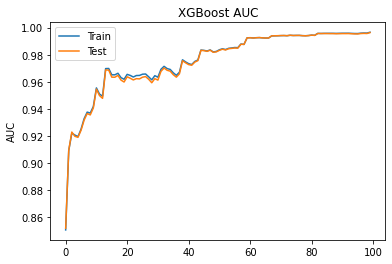

CPU times: user 185 ms, sys: 6.05 ms, total: 191 ms
Wall time: 189 ms


In [63]:
%%time
# Curva AUC
fig, ax = plt.subplots()

evals_result = cpu_trained_model.evals_result()
x_axis = range(0, len(evals_result['validation_0']['auc']))

ax.plot(x_axis, evals_result['validation_0']['auc'], label='Train')
ax.plot(x_axis, evals_result['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

CPU times: user 509 ms, sys: 24 ms, total: 533 ms
Wall time: 822 ms


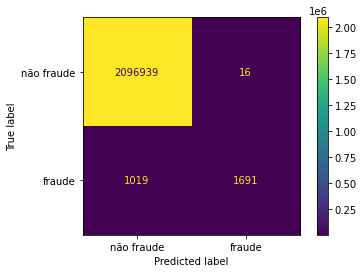

In [64]:
%%time
# Matriz de confusão
cm = cpu_confusion_matrix(y_test, y_pred_cpu.astype(np.int64))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['não fraude', 'fraude'])
_ = disp.plot(values_format='d') 

# Conclusões

In [68]:
# Taxa de identificação de fraudes
1691 / (1691 + 1019)

0.6239852398523985

### A taxa de identificação de fraudes para o classificador XGBoost foi de 62% enquanto o de random forest foi de 62%. Os valores de verdadeiros negativos foi de 16 transações para o modelo XGBoost, ou seja, transações não fraudulentas classificadas como fraudes, sendo um número menor que o metrificado para o modelo random forest que apresentou 18 transações verdadeiras negativas. 